In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import sklearn.metrics as mes
from statsmodels.stats.outliers_influence import variance_inflation_factor

Data description

Date - daye correponding

numbicicletas - 

numdocasvacias - 

numTotalDocas - 

Total cases - 

New cases - 

PM2.5 - 

Precipitation (mm.) - 

Avg (ºC) - 

In [30]:
# Dados Diários de 2020

#DailyGiras2020WithData = pd.read_excel('DailyGiras2020WithData.xlsx')
#DailyGiras2020WithData

In [31]:
DailyGiras2020WithData = pd.read_excel('https://github.com/masterfloss/data/blob/main/dataBikes.xlsx?raw=true')
DailyGiras2020WithData.reset_index()

DailyGiras2020WithData["DaySum"] = DailyGiras2020WithData.index + 1

In [32]:
DailyGiras2020WithData

,Date,numbicicletas,numdocasvacias,numTotalDocas,Total cases,New cases,PM2.5,Precipitation (mm.),Avg temp (ºC),DaySum
0,2020-01-01,8.905,9.660,18.565,0,0,90,0.000,8.300,1
1,2020-01-02,8.532,9.693,18.225,0,0,87,0.000,8.900,2
2,2020-01-03,8.821,9.940,18.761,0,0,91,0.000,12.600,3
3,2020-01-04,8.741,9.596,18.337,0,0,89,0.000,11.700,4
4,2020-01-05,8.982,9.540,18.522,0,0,63,0.000,9.300,5
...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,5.612,12.406,18.018,394573,1577,46,0.000,2.800,362
362,2020-12-28,6.509,12.210,18.719,396666,2093,52,1.300,8.600,363
363,2020-12-29,6.123,11.988,18.111,400002,3336,38,1.900,6.100,364
364,2020-12-30,6.155,12.488,18.643,406051,6049,65,0.000,7.400,365


In [33]:
import statsmodels.api as sm
independentVariables = ['Total cases','New cases','PM2.5','Precipitation (mm.)','Avg temp (ºC)','DaySum']
dependentVariable = 'numdocasvacias'
X=DailyGiras2020WithData[independentVariables]
y=DailyGiras2020WithData[dependentVariable]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         numdocasvacias   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     417.8
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          1.44e-158
Time:                        17:40:16   Log-Likelihood:                -219.84
No. Observations:                 366   AIC:                             453.7
Df Residuals:                     359   BIC:                             481.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.4752    

In [34]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature    VIF
0                const 21.099
1          Total cases  9.700
2            New cases  3.394
3                PM2.5  1.270
4  Precipitation (mm.)  1.083
5        Avg temp (ºC)  3.493
6               DaySum  9.495


In [35]:
df=DailyGiras2020WithData

In [36]:
# Dividir os dados em teste e treino

from sklearn.model_selection import train_test_split

# Variável a calcular
Y= df[dependentVariable]

# identificação das colunas que iremos estudar
X= df[independentVariables]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)#test_size 0,75, train size 0,25

In [37]:
# Calcular a melhor combinação de hidden layers para 4 camadas

# **03/02/2022** alteração para ter em conta o tempo (dias) 
# O algoritmo demora algum tempo, no entanto o resultado para 4 camadas foi: Subset x: 8.000 Subset y: 9.000 Subset z: 11.000 Subset a: 11.000

    # O algoritmo demora algum tempo, no entanto o resultado para 4 camadas foi: Subset x: 11.000 Subset y: 8.000 Subset z: 12.000 Subset a: 9.000
# Tempo de execução: ~7 min.

if 1 == 2: #para não executar
    baseValue = 8 # valor mínimo para cada camada
    maxValue = 14 # valor máximo de cada camada (neste caso é 13 porque se faz > e não >=)

    #inicializar variáveis base
    x, y, z, a, savedx, savedy, savedz, saveda = baseValue, baseValue, baseValue, baseValue, baseValue, baseValue, baseValue, baseValue
    train = 0
    test = 0

    #criação de um ciclo while para cada camada de teste
    while x < maxValue:
        y = baseValue
        while y < maxValue:
            z = baseValue
            while z < maxValue:
                a = baseValue
                while a < maxValue:
                    # define-se e corre-se a nova camada consoante as variáveis, incrementando a cada volta no ciclo
                    MLPRegressorPipeline = Pipeline([('MLPRegressor', MLPRegressor(random_state=1,hidden_layer_sizes = (x, y, z, a), activation='relu', max_iter=5000, solver='lbfgs'))])
                    MLPRegressorPipeline.fit(X_train, y_train)
                    trainScore = MLPRegressorPipeline.score(X_train, y_train)
                    testScore = MLPRegressorPipeline.score(X_test, y_test)
                    # calcular se o teste atual é melhor do que o que está guardado
                    if(trainScore + testScore - (trainScore - testScore) > train + test - (train - test)):
                        savedx, savedy, savedz, saveda = x, y, z, a
                        train = trainScore
                        test = testScore
                    a +=1
                z += 1
            y += 1
        x += 1

    #apresentação dos resultados, correndo novamente o melhor ciclo descoberto
    MLPRegressorPipeline = Pipeline([('MLPRegressor', MLPRegressor(random_state=1,hidden_layer_sizes = (savedx, savedy, savedz, saveda), activation='relu', max_iter=5000, solver='lbfgs'))]) 
    MLPRegressorPipeline.fit(X_train, y_train)

    print('Subset x: {:.3f}'.format(savedx))
    print('Subset y: {:.3f}'.format(savedy))
    print('Subset z: {:.3f}'.format(savedz))
    print('Subset a: {:.3f}'.format(saveda))
    print('Accuracy on the training subset: {:.3f}'.format(MLPRegressorPipeline.score(X_train, y_train)))
    print('Accuracy on the test subset: {:.3f}'.format(MLPRegressorPipeline.score(X_test, y_test)))

In [38]:
# Supervided Learning
pipelines = []
# Criação de várias pipelines para testar diversos modelos de regressão linear e testar o melhor
pipelines.append(Pipeline([('OLS', linear_model.LinearRegression())]))
pipelines.append(Pipeline([('Ridge', linear_model.Ridge())]))
pipelines.append(Pipeline([('Lasso', linear_model.Lasso(alpha = .5))]))
pipelines.append(Pipeline([('BayesianRidge', linear_model.BayesianRidge())]))
pipelines.append(Pipeline([('svm', svm.SVR())]))

# Os próximos 2 modelos de regressão linear foram otimizados através dos processos que se encontram nas células abaixo
pipelines.append(Pipeline([('MLPRegressor', MLPRegressor(random_state=1,hidden_layer_sizes = (8,9,11,11), activation='relu', max_iter=5000, solver='lbfgs'))]))
pipelines.append(Pipeline([('RandomForest', RandomForestRegressor(n_estimators=98, max_depth=3, random_state=0))]))

In [39]:
df2=pd.DataFrame()
print('model: Fit: Accuracy')
for pipeline in pipelines:
        pipeline = pipeline.fit(X_train, y_train) 
        y_test_pred=pipeline.predict(X_test)
        df2=df2.append({'Model':  pipeline.steps[0][0], 
                        #'fit':pipeline.score(X_test, y_test), 
                        #'Accuracy':pipeline.score(X_test, y_test),
                        # Mean absolute error 
                        'MAE': mes.mean_absolute_error(y_test, y_test_pred),
                        # Mean squared error 
                        'MSE': mes.mean_squared_error(y_test, y_test_pred),
                        #       
                        'MDAE':mes.median_absolute_error(y_test, y_test_pred), 
                        # Explain variance score round(sm.explained_variance_score(y_test, y_test_pred) 
                        #R2 score 
                        'R2':mes.r2_score(y_test, y_test_pred)                     
                       }, ignore_index=True)

model: Fit: Accuracy


In [40]:
pd.options.display.float_format = '{:,.3f}'.format
df2

,MAE,MDAE,MSE,Model,R2
0,0.357,0.310,0.194,OLS,0.888
1,0.357,0.310,0.194,Ridge,0.888
2,0.359,0.314,0.197,Lasso,0.887
3,0.358,0.312,0.196,BayesianRidge,0.888
4,0.293,0.231,0.140,svm,0.920
5,0.295,0.219,0.146,MLPRegressor,0.916
6,0.297,0.222,0.140,RandomForest,0.920


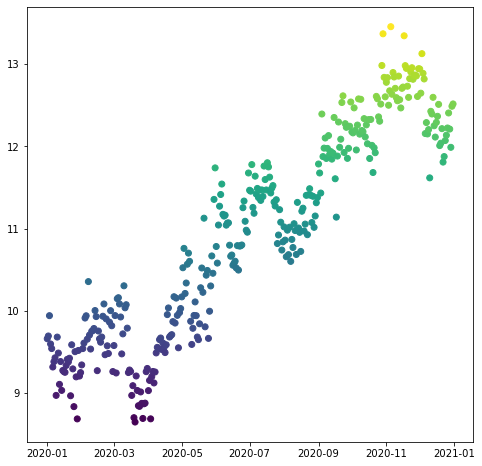

In [41]:
from matplotlib.pyplot import figure
plt.scatter(x='Date', y='numdocasvacias', c='numdocasvacias', cmap='viridis', data=DailyGiras2020WithData)
plt.rcParams["figure.figsize"] = (19,9)
plt.show()
plt.close()

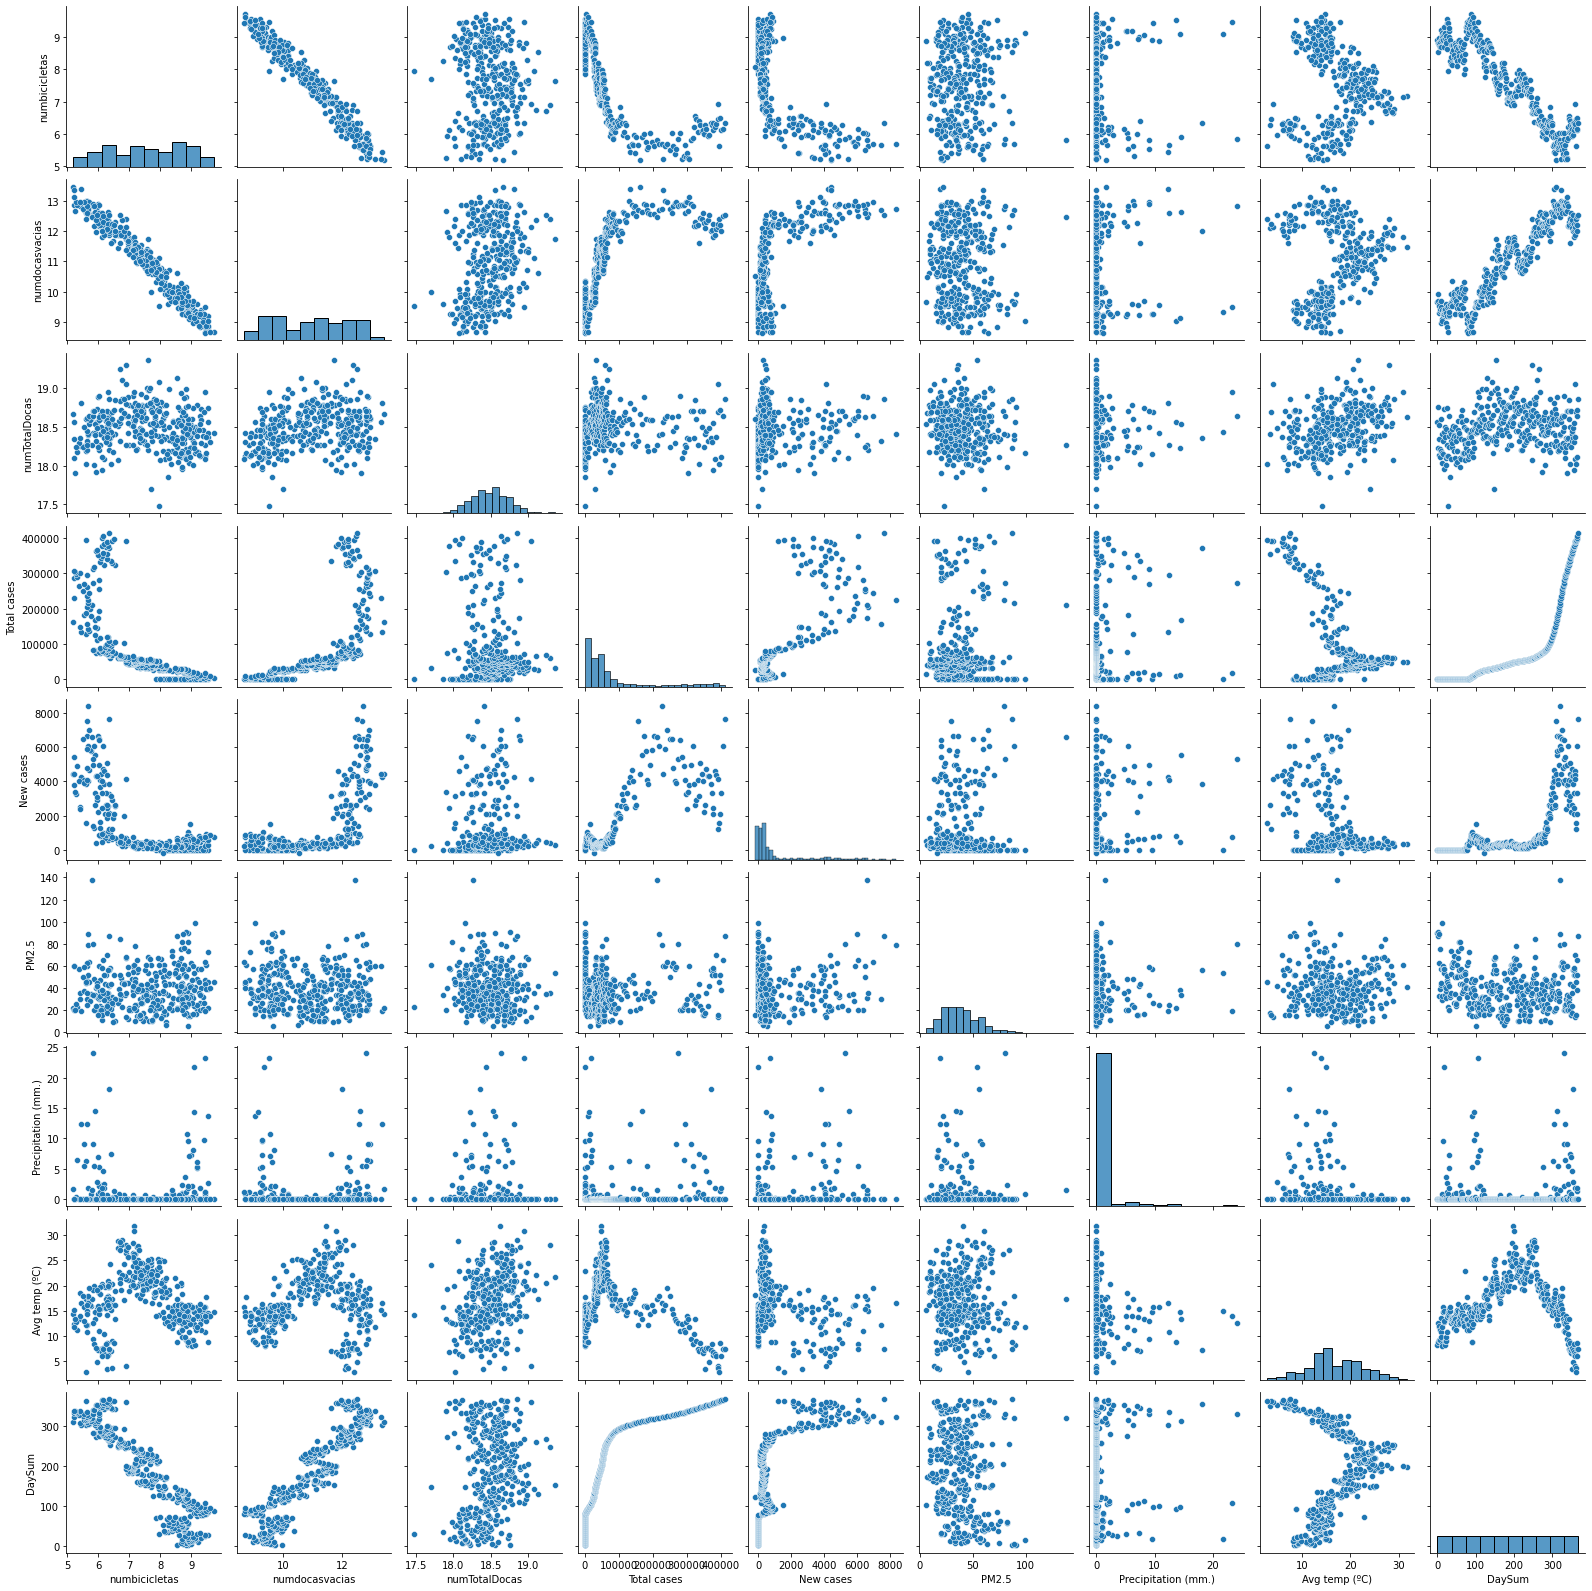

In [42]:
import seaborn as sns
# Criação de gráficos com a Relação entre as colunas,
# Conseguimos observar que poderá haver uma relação de clusters na relação entre num de docas vazias e Temperatura média
# O estudo será focado no número de docas vazias, no caso abaixo as colunas 1 e 3, não serão importantes, a coluna 2 tem um histograma de docas vazias
# Parece haver uma relação entre num de casos de covid e número de docas vazias

sns.pairplot(DailyGiras2020WithData)

 RandomForestRegressor e MLPRegressor parecem-nos ser os modelos com mais precisão
Apesar de ter tido um valor elevado de precisão, os modelos preditivos de regressão linear não deverão ter muita relevância,
Porque estamos a comparar 4 variáveis a utilização de Giras relativamente a New cases','PM2.5','Precipitation (mm.)','Avg (ºC)'
 E visto que o tamanho da nossa amostra de dados é de 366 (dias)
 A precisão apesar de ser alta não garantimos que seja relevante

In [43]:
X=DailyGiras2020WithData[dependentVariable]
y=DailyGiras2020WithData[independentVariables]

mlp = MLPRegressor(random_state=1,hidden_layer_sizes = (8,9,11,11), activation='relu', max_iter=5000, solver='lbfgs')

model = mlp.fit(y, X)

<AxesSubplot:xlabel='0 PredictionFor Day', ylabel='1 Prediction'>

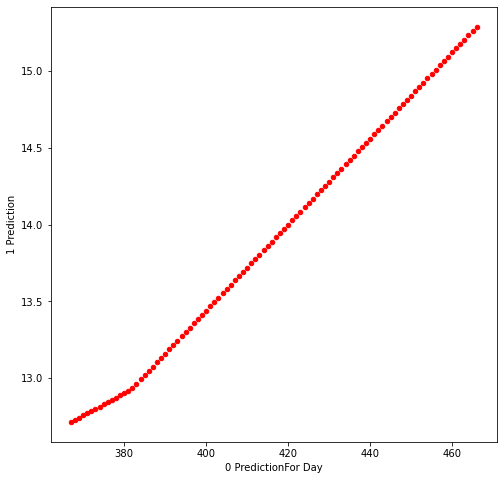

In [44]:
dfPredictions=pd.DataFrame()
plt.rcParams["figure.figsize"] = (8,8)
input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

day = input['DaySum'].iloc[-1] #366

for i in range(100):
    day = day + 1
    input['DaySum'] = day
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor Day': day, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor Day',
        y = '1 Prediction',
        color = 'red')

<AxesSubplot:xlabel='0 PredictionFor New cases', ylabel='1 Prediction'>

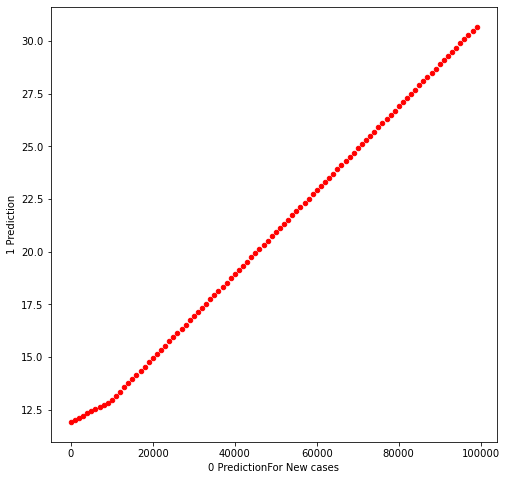

In [45]:
#'New cases'
dfPredictions=pd.DataFrame()

input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

newCases = 0 #7627

for i in range(100):
    newCases = i * 1000
    input['New cases'] = newCases
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor New cases': newCases, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor New cases',
        y = '1 Prediction',
        color = 'red')

<AxesSubplot:xlabel='0 PredictionFor PM2.5:', ylabel='1 Prediction'>

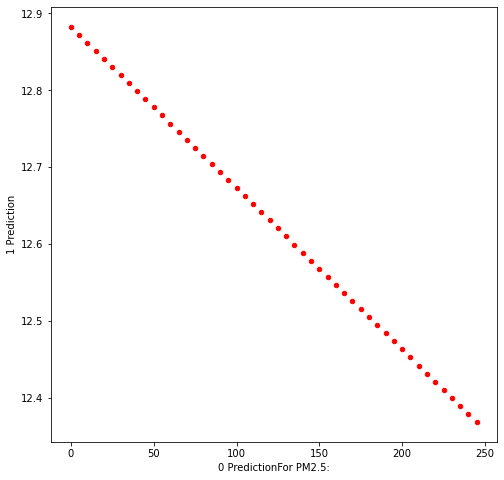

In [46]:
#'PM2.5'  range 
# Good                              0 to 12
# Moderate                          12.1 to 35.4
# Unhealthy for Sensitive Groups    35.5 to 55.4	
# Unhealthy                         55.5 to 150.4

dfPredictions=pd.DataFrame()

input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

PM25 = 0 #7627

for i in range(50):
    PM25 = i * 5
    input['PM2.5'] = PM25
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor PM2.5:': PM25, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor PM2.5:',
        y = '1 Prediction',
        color = 'red')

<AxesSubplot:xlabel='0 PredictionFor Precipitation (mm.):', ylabel='1 Prediction'>

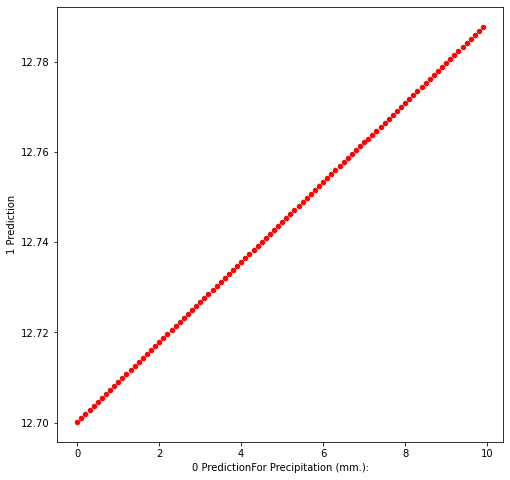

In [47]:
#  'Precipitation (mm.)'
dfPredictions=pd.DataFrame()

input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

Precipitation = 0 #7627

for i in range(100):
    Precipitation = i * 0.1
    input['Precipitation (mm.)'] = Precipitation
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor Precipitation (mm.):': Precipitation, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor Precipitation (mm.):',
        y = '1 Prediction',
        color = 'red')

<AxesSubplot:xlabel='0 PredictionFor Avg temp (ºC):', ylabel='1 Prediction'>

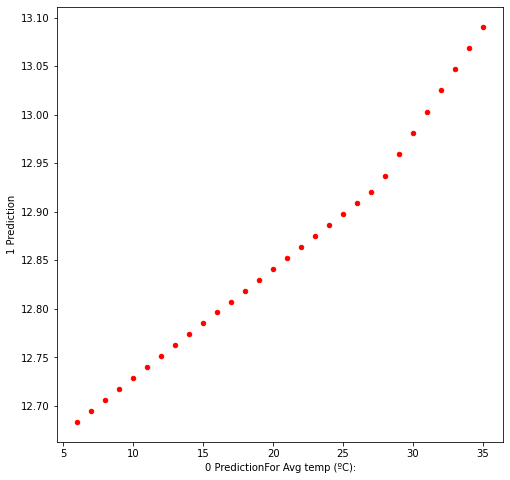

In [48]:
#  'Avg temp (ºC)',
dfPredictions=pd.DataFrame()

input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

Temperature = 5 #7627

for i in range(30):
    Temperature = Temperature + 1
    input['Avg temp (ºC)'] = Temperature
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor Avg temp (ºC):': Temperature, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor Avg temp (ºC):',
        y = '1 Prediction',
        color = 'red')

<AxesSubplot:xlabel='0 PredictionFor Total Cases', ylabel='1 Prediction'>

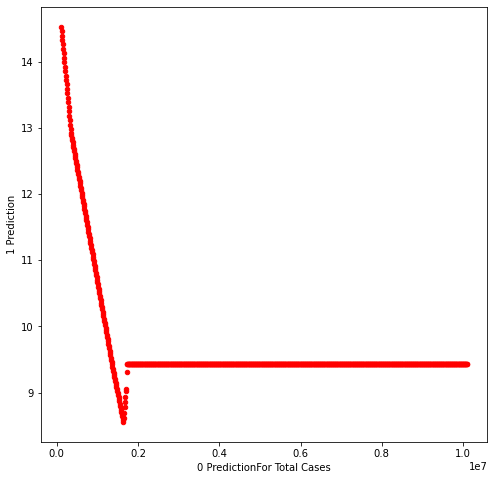

In [49]:
dfPredictions=pd.DataFrame()

input = DailyGiras2020WithData[independentVariables].iloc[[-1]]

TotalCases = 100000 #413678

for i in range(1000):
    TotalCases = TotalCases + 10000
    input['Total cases'] = TotalCases
    predictedValue = mlp.predict(input) 
    dfPredictions = dfPredictions.append({'0 PredictionFor Total Cases': TotalCases, '1 Prediction': predictedValue}, ignore_index=True)

dfPredictions.plot(kind = 'scatter',
        x = '0 PredictionFor Total Cases',
        y = '1 Prediction',
        color = 'red')


In [50]:
DailyGiras2020WithData[independentVariables]

,Total cases,New cases,PM2.5,Precipitation (mm.),Avg temp (ºC),DaySum
0,0,0,90,0.000,8.300,1
1,0,0,87,0.000,8.900,2
2,0,0,91,0.000,12.600,3
3,0,0,89,0.000,11.700,4
4,0,0,63,0.000,9.300,5
...,...,...,...,...,...,...
361,394573,1577,46,0.000,2.800,362
362,396666,2093,52,1.300,8.600,363
363,400002,3336,38,1.900,6.100,364
364,406051,6049,65,0.000,7.400,365


In [51]:
import statsmodels.api as sm
independentVariables1 = ['Total cases','New cases','PM2.5','Precipitation (mm.)','Avg temp (ºC)']
dependentVariable1 = 'numdocasvacias'
X=DailyGiras2020WithData[independentVariables1]
y=DailyGiras2020WithData[dependentVariable1]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         numdocasvacias   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     254.6
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          7.73e-116
Time:                        17:40:44   Log-Likelihood:                -323.26
No. Observations:                 366   AIC:                             658.5
Df Residuals:                     360   BIC:                             681.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.2507    